# Domanda 1

Leggere il file di dati `SuperNovae.txt`. La prima colonna corrisponde al redshift, la seconda alla distanza e la terza all'errore sulla distanza.

In [1]:
import numpy as np

In [2]:
redshift, distanza, sigma = np.loadtxt('SuperNovae.txt', unpack=True)

In [16]:
print (len (distanza))

577


# Domanda 2

Fare un grafico dei dati mettendo sull'asse X il redshift e sull'asse Y la distanza (includere gli errori nel grafico)

In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Distanza [MPc]')

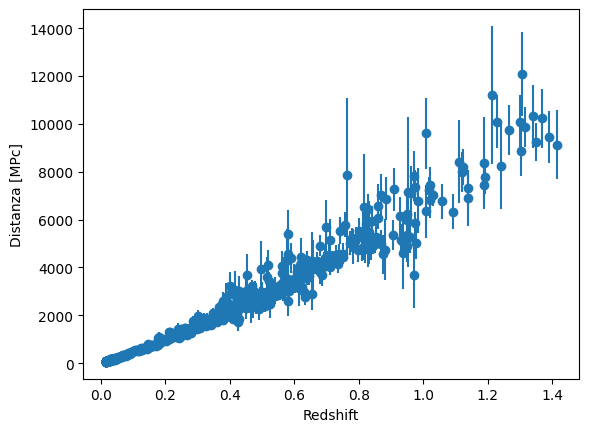

In [4]:
fig, ax = plt.subplots()
ax.errorbar(redshift, distanza, yerr=sigma, marker='o', linestyle='none')
ax.set_xlabel('Redshift')
ax.set_ylabel('Distanza [MPc]')


# Domanda 3

Eseguire un fit dei deti utilizzando 3 differenti modelli

- $$D_L = \frac{z\cdot c}{H_0}$$
- $$D_L = \frac{c}{H_0} \cdot \left( z + \frac{1}{2}\left( 1- q\right)z^2\right)$$
- $$D_L = \frac{c}{H_0} \cdot \left( z + \frac{1}{2}\left( 1- q\right)z^2 - \frac{1}{6}\left(1 - q - 3q^2 + 1\right)z^3\right)$$

Dove $z$ è il redshift e $D$ è la distanza. $H_0$ è la costante di Hubble, $q$ è il parametro di Decelerazione ed infine $c=3\cdot 10^5 km/s$ è la velocità della luce nel vuoto

In [5]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [6]:
def distance_linear(z, H0):
    c = 3e5
    return c * z / H0

def distance_quadratic(z, H0, q):
    c = 3e5
    return c / H0 * (z + 0.5 * z**2 * (1-q))

def distance_cubic(z, H0, q):
    c = 3e5

    fact = c * z / H0
    mult = 1 + 0.5 * (1-q) * z - 1 / 6 * (1 - q - 3*q**2 + 1) * z**2

    return fact * mult

In [7]:
def init_H0(d, z):
    c = 3e5
    return c * z / d

H0_start = np.mean(init_H0(distanza[redshift<0.1], redshift[redshift<0.1]))

## Fit Lineare

In [8]:
least_squares = LeastSquares(redshift, distanza, sigma, distance_linear)
linear = Minuit(least_squares, H0 = H0_start)
linear.migrad()
linear.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1747 (χ²/ndof = 3.0)       │              Nfcn = 25               │
│ EDM = 1.16e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │   61.87   │   0.21    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────┐
│    │     H0 │
├────┼────────┤
│ H0 │ 0.0426 │
└────┴────────┘

## Fit Quadratico

In [9]:
least_squares = LeastSquares(redshift, distanza, sigma, distance_quadratic)
quad = Minuit(least_squares, H0 = H0_start, q=-1)
quad.migrad()
quad.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 556.8 (χ²/ndof = 1.0)      │              Nfcn = 54               │
│ EDM = 3.01e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │   69.17   │   0.35    │            │            │         │         │       │
│ 1 │ q    │   -0.13   │   0.04    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      H0       q │
├────┼─────────────────┤
│ H0 │   0.123 -0.0098 │
│  q │ -0.0098 0.00137 │
└────┴─────────────────┘

## Fit Cubico

In [10]:
least_squares = LeastSquares(redshift, distanza, sigma, distance_cubic)
cubic = Minuit(least_squares, H0 = H0_start, q=-1)
cubic.migrad()
cubic.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 535.9 (χ²/ndof = 0.9)      │              Nfcn = 59               │
│ EDM = 3e-07 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │   70.67   │   0.32    │            │            │         │         │       │
│ 1 │ q    │  -0.597   │   0.021   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       H0        q │
├────┼───────────────────┤
│ H0 │      0.1  -4.5e-3 │
│  q │  -4.5e-3 0.000438 │
└────┴───────────────────┘

# Domanda 4

Fare un grafico con i dati ed i tre modelli sovrapposti utilizzando `ax.legend()` per indicare chiaramete i modelli. Stampare la Costante di Hubble associata al modello che risulta più adatto per descrivere i dati

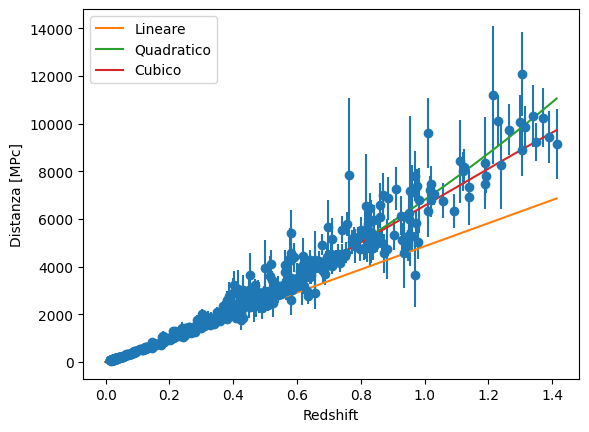

In [11]:
z = np.linspace(0, np.amax(redshift), 1000)

fig, ax = plt.subplots()
ax.errorbar(redshift, distanza, yerr=sigma, marker='o', linestyle='none')
ax.plot(z, distance_linear(z, *linear.values), label = 'Lineare')
ax.plot(z, distance_quadratic(z, *quad.values), label = 'Quadratico')
ax.plot(z, distance_cubic(z, *cubic.values), label = 'Cubico')
ax.set_xlabel('Redshift')
ax.set_ylabel('Distanza [MPc]')
ax.legend()

In [12]:
from scipy.stats import chi2

In [13]:
H0_finale = 0
p_value_finale = 0

modelli = [linear, quad, cubic]

count = 0

for mod in modelli:
    p_value = 1. - chi2.cdf (mod.fval, df = mod.ndof)

    if p_value > p_value_finale and p_value < 0.95:
        p_value_finale = p_value
        H0_finale = mod.values['H0']
        count += 1

print(f'Il Valore della Costante di Hubble è {H0_finale}')

Il Valore della Costante di Hubble è 70.67328248298128


# Domanda 5

Il Parametro di Decelerazione $q$ è legato alla quantità di materia nell'Universo dalla seguente formula $$q = \frac{3\cdot\Omega_m}{2} - 1$$. Dove $\Omega_m$ è la densità di materia nell'Universo. 
Utilizzare i Toy-Experiment per deteminare il valore mediano e  gli estremi dell'intervallo che contegono tra il $10\%$ ed il $90\%$ di $Omega_m$. Per fare questo, generare $q$ distributi gaussianamente in maniera pseudo-casuale utilizzando il teorema del limite centrale. I valori di $\mu$ e $\sigma$ siano determinati dal modello scelto al punto precedente. 

In [14]:
import lib

In [15]:
Ntoys = 10000

omega = []

q = modelli[count].values['q']
delta_q = modelli[count].errors['q']

for _ in range(Ntoys):

    qt = lib.rand_TCL_ms (q, delta_q, N_sum = 50)
     
    omega.append(
        2 / 3 * ( qt + 1 )
    )

omega.sort()

print(f'Il valore mediano di Omega è {omega[int(len(omega) * 0.5)]:.4f}')
print(f'Il valore di Omega è compreso tra {omega[int(len(omega) * 0.1)]:.4f} e {omega[int(len(omega) * 0.9)]:.4f}')

Il valore mediano di Omega è 0.2692
Il valore di Omega è compreso tra 0.2513 e 0.2867
